<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/nhandien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhận diện khuôn mặt 15 thành viên trong lớp**

1.   Chính
2.   Hưng
3.   Lâm
4.   Nam
5.   Nha
6.   Nhân
7.   Nhật
8.   Phát
9.   Phong
10.  Quân
11.  Quý
12.  Quyết
13.  Thoa
14.  Việt
15.  Vũ

In [2]:
#Khai báo thư viện

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
#-----------------------------------------------------------------------------#
from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------#
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#Đường dẫn file train
data = '/content/drive/MyDrive/gk/khuonmat/train'

In [4]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 547 images belonging to 15 classes.


{'Chinh': 0,
 'Hung': 1,
 'Lam': 2,
 'Nam': 3,
 'Nha': 4,
 'Nhan': 5,
 'Nhat': 6,
 'Phat': 7,
 'Phong': 8,
 'Quan': 9,
 'Quy': 10,
 'Quyet': 11,
 'Thoa': 12,
 'Viet': 13,
 'Vu': 14}

In [5]:
#Tạo mô hình Sequential
model=Sequential()

#Tích chập 1
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))

#Tích chập 2
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

#Tích chập 3
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())    #Làm phẳng thành vecto

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(15,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [6]:
#Bắt đầu huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=30, batch_size=256, verbose=1)  #verbose=1 -> hiển thị quá trình học ra

Epoch 1/30
18/18 [==============================] - 182s 9s/step - loss: 4.2594 - accuracy: 0.4479
Epoch 2/30
18/18 [==============================] - 61s 3s/step - loss: 0.4272 - accuracy: 0.8739
Epoch 3/30
18/18 [==============================] - 64s 4s/step - loss: 0.1778 - accuracy: 0.9598
Epoch 4/30
18/18 [==============================] - 66s 4s/step - loss: 0.1741 - accuracy: 0.9543
Epoch 5/30
18/18 [==============================] - 76s 4s/step - loss: 0.0520 - accuracy: 0.9854
Epoch 6/30
18/18 [==============================] - 78s 4s/step - loss: 0.0265 - accuracy: 0.9945
Epoch 7/30
18/18 [==============================] - 62s 3s/step - loss: 0.0323 - accuracy: 0.9890
Epoch 8/30
18/18 [==============================] - 64s 4s/step - loss: 0.0299 - accuracy: 0.9890
Epoch 9/30
18/18 [==============================] - 63s 4s/step - loss: 0.0267 - accuracy: 0.9945
Epoch 10/30
18/18 [==============================] - 63s 4s/step - loss: 0.0245 - accuracy: 0.9927
Epoch 11/30
18/18 

In [7]:
#Show độ chính xác và độ mất mát 
Score=model.evaluate(Train,verbose=0)
print('Độ Mất Mát: ', Score[0])
print('Độ Chính Xác: ', Score[1])

Độ Mất Mát:  0.0015863132430240512
Độ Chính Xác:  1.0


In [8]:
#Lưu file
model.save('/content/drive/MyDrive/gk/save_train/khuonmat.h5')

In [9]:
#Load file
model_1 = load_model('/content/drive/MyDrive/gk/save_train/khuonmat.h5')

1/1 [==============================] - 0s 239ms/step
Đây là  : Vũ


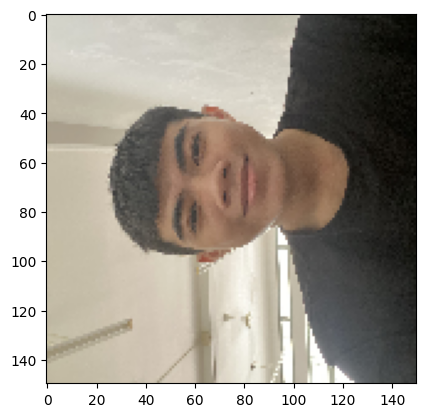

1/1 [==============================] - 0s 23ms/step
Đây là  : Nhật


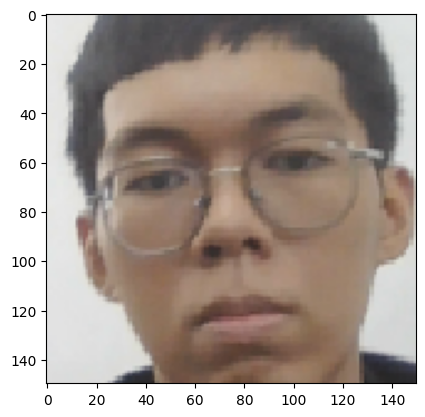

1/1 [==============================] - 0s 25ms/step
Đây là  : Hưng


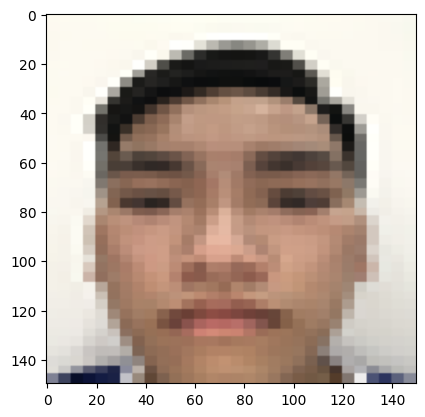

1/1 [==============================] - 0s 42ms/step
Đây là  : Lâm


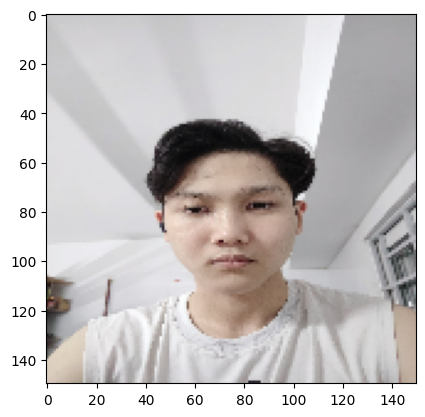

1/1 [==============================] - 0s 34ms/step
Đây là  : Phong


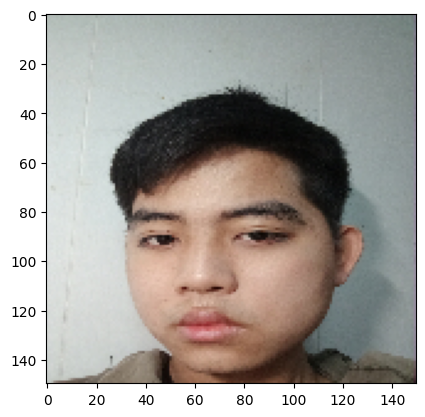

1/1 [==============================] - 0s 37ms/step
Đây là  : Quân


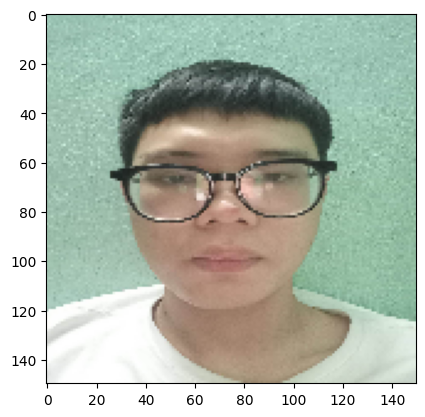

1/1 [==============================] - 0s 48ms/step
Đây là  : Quyết


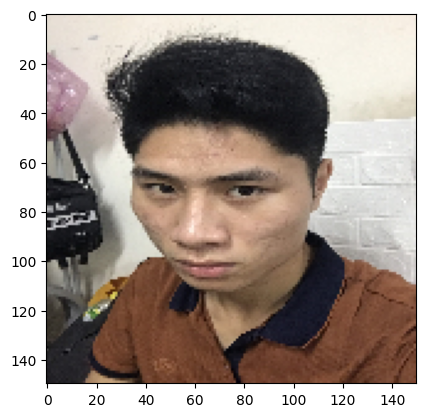

1/1 [==============================] - 0s 26ms/step
Đây là  : Quý


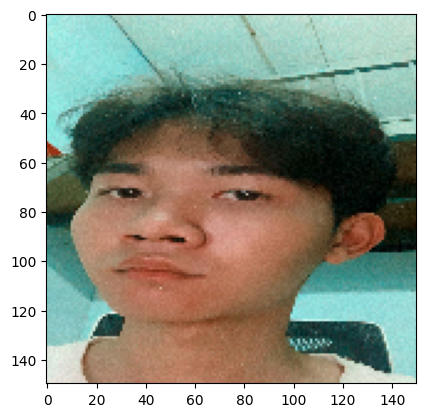

1/1 [==============================] - 0s 25ms/step
Đây là  : Việt


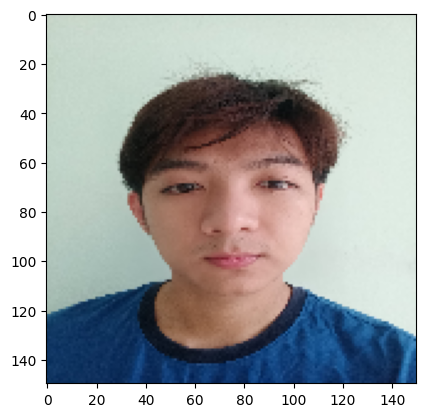

1/1 [==============================] - 0s 24ms/step
Đây là  : Nha


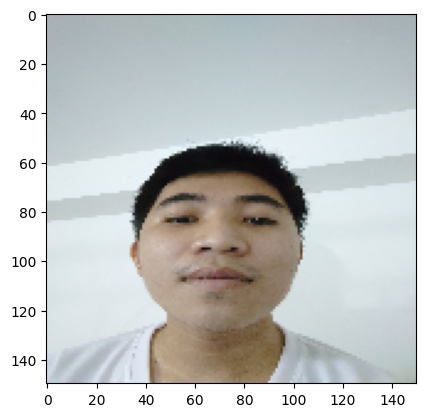

1/1 [==============================] - 0s 23ms/step
Đây là  : Phát


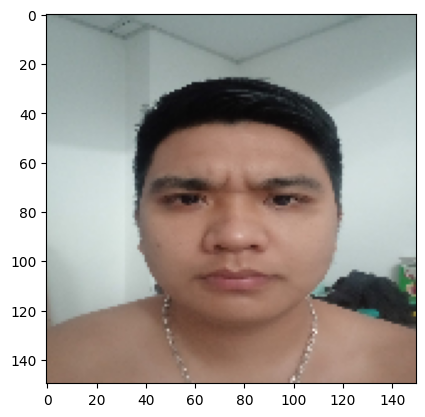

1/1 [==============================] - 0s 23ms/step
Đây là  : Thoa


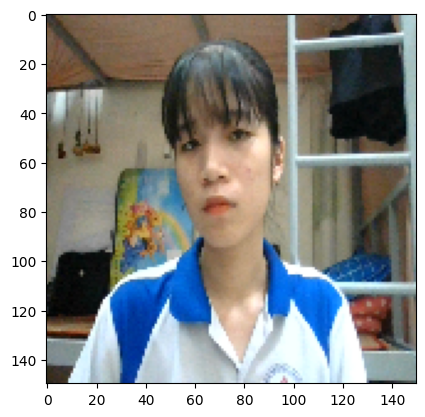

1/1 [==============================] - 0s 25ms/step
Đây là  : Nhân


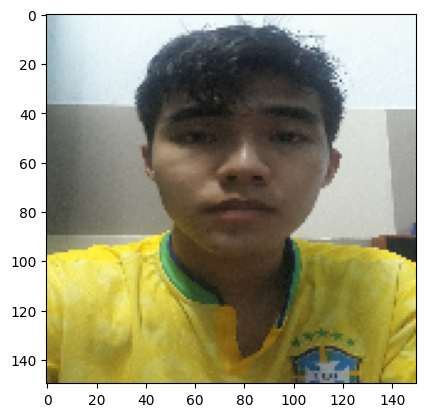

1/1 [==============================] - 0s 26ms/step
Đây là  : Chính


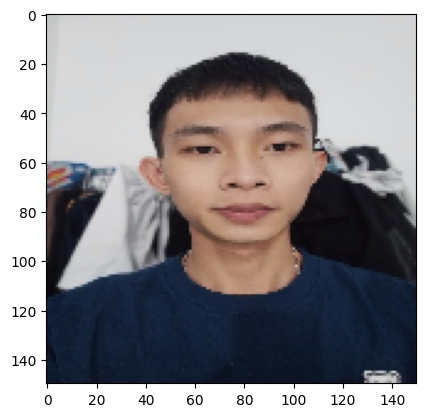

1/1 [==============================] - 0s 24ms/step
Đây là  : Nam


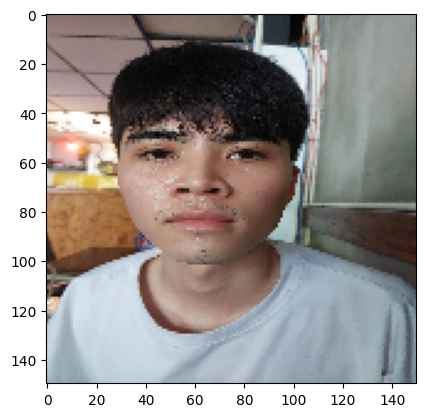

In [10]:
#Test(nhận dạng khuôn mặt 15 thành viên trong lớp)
folder='/content/drive/MyDrive/gk/khuonmat/test/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Chính', 'Hưng', 'Lâm', 'Nam', 'Nha',
              'Nhân', 'Nhật', 'Phát', 'Phong', 'Quân',
              'Quý', 'Quyết', 'Thoa', 'Việt', 'Vũ']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()